<a href="https://colab.research.google.com/github/SatyamPawale/COMPUTER-VISION/blob/main/DL_Sheet02_DB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning - Winter Term 2025/2026

<hr style="border:2px solid gray">

### Exercise Sheet 02

<br>

# 5.2) Train MLP with nonlinear decision boundary in PyTorch

Until now, we used our own framework. From now on, we will use PyTorch throughout this semester (in fact, we will use it next semester as well). It is a ubiquitiuos and easy-to-use library that allows rapid prototyping of deep learning models. Chances are high, that you will use it in your professional life later. Therefore, we encourage you to get a good grasp of it as soon as possible. You will see that the inferface is very similar to the framework you built yourself. Here is a relatively short tutorial about the backbones of PyTorch:

[https://youtu.be/nf-r9gnum7o?si=57TdegnhlFDuQ1Bg](https://youtu.be/nf-r9gnum7o?si=57TdegnhlFDuQ1Bg)

You can also use google colab for PyTorch (even with GPU support, which might be helpful for later exercise sheets).

Introduction to Colab
[https://colab.research.google.com](https://colab.research.google.com)

Tutorial 2: Introduction to PyTorch
[https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.ipynb](https://colab.research.google.com/github/phlippe/uvadlc_notebooks/blob/master/docs/tutorial_notebooks/tutorial2/Introduction_to_PyTorch.ipynb)

But now, let's get to the action!

In [17]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# Import the pytorch library. You might need to install it.
import torch
from torch import nn

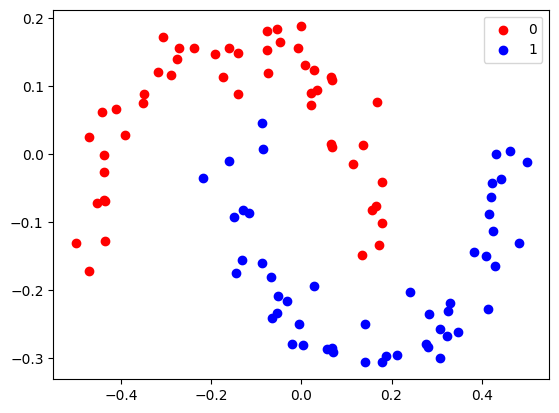

<Figure size 640x480 with 0 Axes>

In [19]:
# We provide you the dataset in .npz file. You just need to load it here.
dataset = np.load("/content/sample_data/2d_pcl_dataset.npz")
X, y = dataset['X'], dataset['y']


### Plot the data ###
X0 = X[y==0] # 50 2D points have label 0
X1 = X[y==1] # 50 2D points have label 1

y = np.expand_dims(y, axis=1)

def plot(X0, X1, fit_param=None):
    plt.scatter(X0[:,0], X0[:,1], color='red', label=0)
    plt.scatter(X1[:,0], X1[:,1], color='blue', label=1)

    plt.legend()
    plt.show()
    plt.clf()

plot(X0, X1)

In [ ]:
# Create the MLP class

class MLP(torch.nn.Module):

    def __init__(self):
        super().__init__()
        # TODO completed: Create MLP with linear layers + activations
        self.layers = nn.Sequential(
            nn.Linear(2, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)    # output raw logits
        )

    def forward(self, x):
        return self.layers(x)

# Set fixed random number seed
torch.manual_seed(42)

# initialize the model
model = MLP()

print(model)
print("number of parameters", sum(p.numel() for p in model.parameters()))



MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
number of parameters 337


In [ ]:
# Set fixed random number seed (for reproducibility)
torch.manual_seed(42)

In [ ]:
# initialize the model
model = MLP()

# Look at the model and the number of parameters
print(model)
print("number of parameters", sum(p.numel() for p in model.parameters()))


MLP(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=16, bias=True)
    (1): ReLU()
    (2): Linear(in_features=16, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=1, bias=True)
  )
)
number of parameters 337


In [ ]:
# TODO: Set the loss function. Which function makes sense for the problem at hand?
# criterion = nn.(your loss function here)
criterion = nn.BCEWithLogitsLoss()  # binary classification loss


In [ ]:
# TODO: Set the optimizer. Start with SGD in the beginning.
# Afterwards you can try different algorithms from the lecture
# and see how effective they are. Try also different learning rates
# to develop an intuition about the effect of it.
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)


In [ ]:
# Before starting the training we need to convert the data into a tensor
# Pytorch works **only** with tensors
X = torch.Tensor(X).float()
y = torch.Tensor(y).float()
print(X.dtype, y.dtype)

torch.float32 torch.float32


In [ ]:
# Training loop

# Let the model know we are training
model.train()

# This time, we provide you the training loop.
# You have done it already in the previous exercise.
# You might still need to decide for the training length though.
# It is a hyperparameter and depends on other features of your network.
epochs = 5000  # chosen reasonable number

for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_hat = model(X)

    # Compute the loss
    loss = criterion(y_hat, y)

    # Backward pass
    loss.backward()

    # Weight update
    optimizer.step()

    # Print loss occasionally
    if epoch % 500 == 0:
        print(f'Loss after epoch {epoch} --> {loss.item()}')

print('Training completed')

Loss after epoch 0 --> 0.6918049454689026
Loss after epoch 500 --> 0.2712174952030182
Loss after epoch 1000 --> 0.26546040177345276
Loss after epoch 1500 --> 0.25349652767181396
Loss after epoch 2000 --> 0.2268838882446289
Loss after epoch 2500 --> 0.1431569904088974
Loss after epoch 3000 --> 0.06822249293327332
Loss after epoch 3500 --> 0.0345970056951046
Loss after epoch 4000 --> 0.020852727815508842
Loss after epoch 4500 --> 0.014366980642080307
Training completed


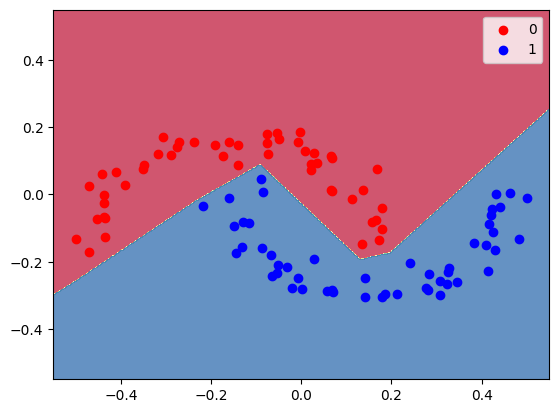

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot model's performance


# Create mesh grid for visualization
p = np.linspace(-0.55, 0.55, 500)
x_plot, y_plot = np.meshgrid(p, p)
X_plot = np.stack((x_plot, y_plot), axis=2).reshape(-1, 2)

# Feed the created numbers into the model
output = model(torch.Tensor(X_plot)).detach().numpy()
output = 1 / (1 + np.exp(-output))  # apply sigmoid
output = np.round(output).reshape(x_plot.shape[0], x_plot.shape[1])

plt.contourf(x_plot, y_plot, output, cmap=plt.cm.Spectral, alpha=0.8)

# Plot the dots
plot(X0, X1)
